# Wijn 
Cluster de Wine dataset zo optimaal mogelijk met KMeans

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
wine = datasets.load_wine()
x = wine.data
y = wine.target
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

Probeer met verschillende waardes van k.

In [31]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(x)

Plot de cluster centers - hulp van chatGPT toegelaten.

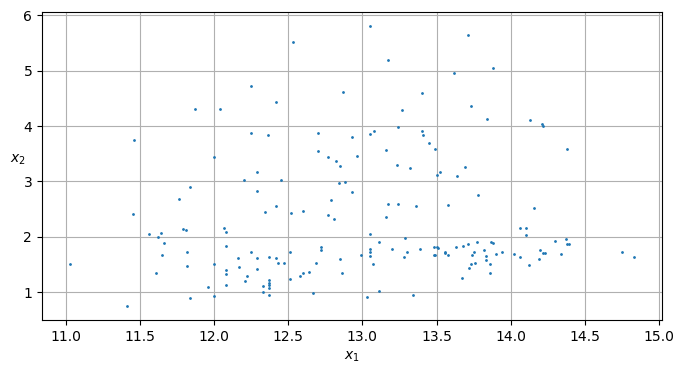

In [32]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(x)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

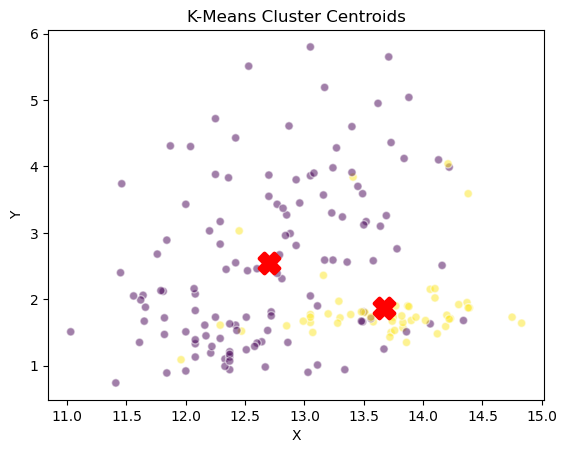

In [34]:
centroids = kmeans.cluster_centers_

plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, edgecolors='w')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.title('K-Means Cluster Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Nu het resultaat checken voor meerdere k's, gebruik silhouette scores en dergelijke om te kijken wat er ideaal is.

# Image Segmentation
We gaan clustering gebruiken om een afbeeldingen stukken met gelijkaardige kleur te vinden. We beginnen met een foto te downloaden die we gaan gebruiken:

In [35]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [36]:
import urllib.request

homl3_root = "https://live.staticflickr.com/65535/52193615054_31a267984c_b.jpg"
filename = "52193615054_31a267984c_b.jpg"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

Met de volgende code kan je het prentje inladen, het bevat een object met 682 rijen, 1024 kolommen, en nog 3 lagen. Waarom precies die aantallen ?

In [37]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(682, 1024, 3)

Hervorm de data met het reshape commando. Zoek zelf op wat je exact moet doen. image is een 3D numpy array

Nu kunnen we het eigenlijk KMeans algoritme beginnen gebruiken

Maak nu verschillende clusteringen naar een lager aantal kleuren (10,8,6,4,2). Dit gaan We nu niet doen met OpenCV zoals in de les, maar met Python en sklearn zelf. Denk na hoe je de afbeelding met minder kleuren kunt terugkrijgen. Een deel van de code is gegegevn

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    # train kmeans met de desbetreffende parameters
    segmented_img = None # aan te passen, hier moet je iets slims doen
    segmented_imgs.append(segmented_img.reshape(image.shape))

¨Plot deze beelden met lagere waardes, naast het orgineel. Vraag hulp aan chatGPT

Maak ven je code een mooie functie die een URL en aantal kleuren binnenneemt, en het beeld met minder kleuren plot (of wegschrijft naar disk). Gebruik wat je tot nu toe hebt gemaakt.

# Kmeans vs DBSCAN
Kies telkens een goede oplossing voor volgende datasets:
- Iris
- Mail Segmentation: dataset vind je op Digitap

Pas zowel KMeans (verschillende k's) als DBScan toe
Kijk indien mogelijk naar scatterplots en beoordeel visueel. Gebruik gekende objectieve scoringstechnieken om de beste keuze te maken.

### Iris

### Mail segmentation

In [8]:
data = pd.read_csv('data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
